In [51]:
# import modules
import pandas as pd
import matplotlib.pyplot as plt
# current version of seaborn generates a bunch of warnings to ignore 
import warnings 
warnings.filterwarnings("ignore")
import seaborn as sns

# set sns style
sns.set(style='white', color_codes=True)

# Load dataset - Iris dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
iris_dataset = pd.read_csv(url, names=names)


In [52]:
# take a look at
print(iris_dataset.head())

   sepal-length  sepal-width  petal-length  petal-width        class
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


In [53]:
# look at number in categories
print(iris_dataset['class'].value_counts())

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: class, dtype: int64


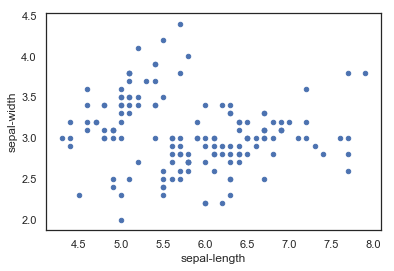

In [54]:
iris_dataset.plot(kind="scatter", x="sepal-length", y="sepal-width")

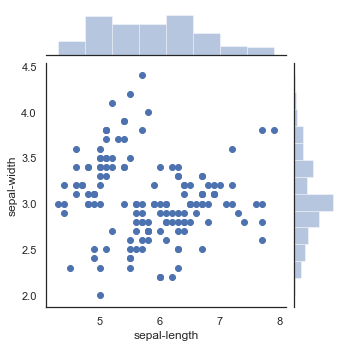

In [58]:
# sns jointplot shows bivariate scatterplots and univariate histograms on the same figure 
# height = height of plot
sns.jointplot(x="sepal-length", y="sepal-width", data=iris_dataset, height=5)


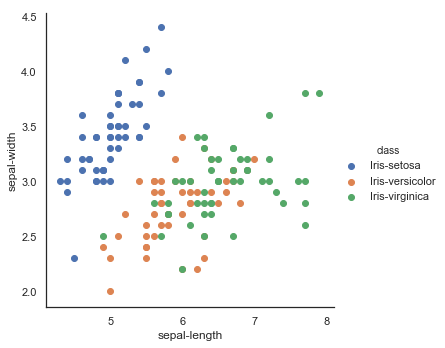

In [56]:
# Can use seaborn's FacetGrid to color the scatterplot by class
sns.FacetGrid(iris_dataset, hue="class", height=5) \
   .map(plt.scatter, "sepal-length", "sepal-width") \
   .add_legend()

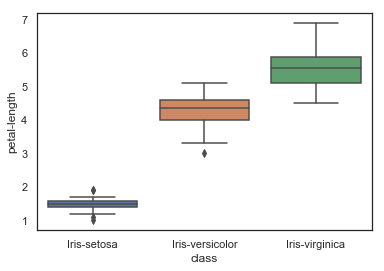

In [16]:
# Can look at univariate data -  individual feature in Seaborn through a boxplot
sns.boxplot(x="class", y="petal-length", data=iris_dataset)

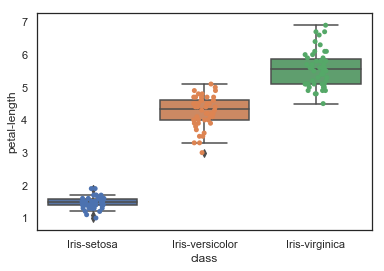

In [17]:
# Can add individual points using Seaborn's striplot - use jitter=True so that all the points don't fall in single vertical line
#
# Saving the resulting axes as ax each time causes the resulting plot to be shown
# on top of the previous axes
ax = sns.boxplot(x="class", y="petal-length", data=iris_dataset)
ax = sns.stripplot(x="class", y="petal-length", data=iris_dataset, jitter=True, edgecolor="gray")

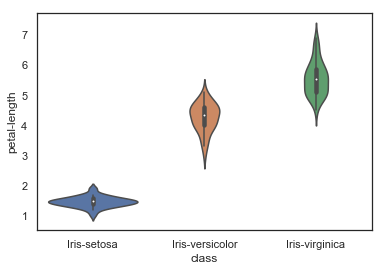

In [60]:
# A violin plot combines the benefits of the previous two plots and simplifies them
# Denser regions of the data are fatter, and sparser thiner in a violin plot
sns.violinplot(x="class", y="petal-length", data=iris_dataset, height=6)

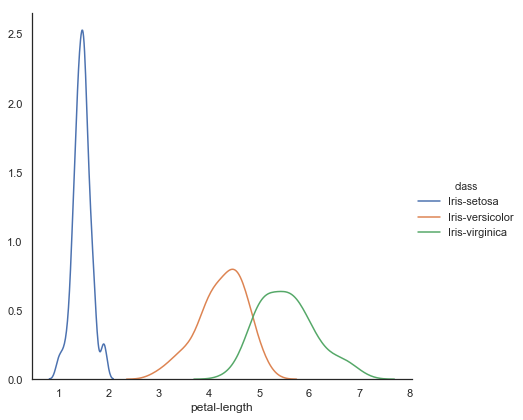

In [61]:
# A final seaborn plot useful for looking at univariate relations is the kdeplot,
# which creates and visualizes a kernel density estimate of the underlying feature
sns.FacetGrid(iris_dataset, hue="class", size=6) \
   .map(sns.kdeplot, "petal-length") \
   .add_legend()

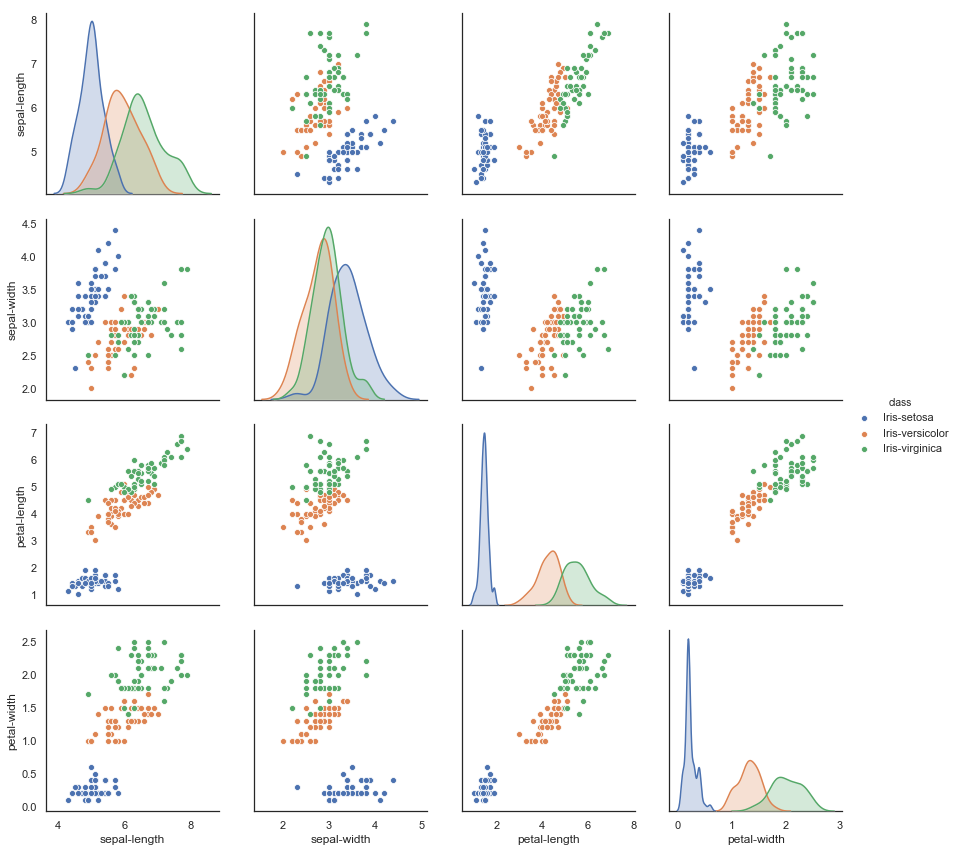

In [62]:
# Pairplot - shows the bivariate relation between each pair of features
# 
# From the pairplot, we'll see that the Iris-setosa species is separated from the other
# two across all feature combinations

sns.pairplot(iris_dataset, hue="class", height=3)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f9fff60>,
      dtype=object)

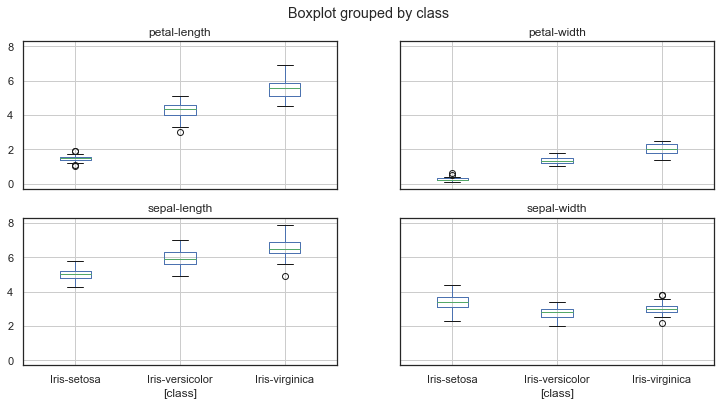

In [30]:
# We can make figures with Pandas
# We can quickly make a boxplot with Pandas on each feature split out by species
iris_dataset.boxplot(by="class", figsize=(12, 6))


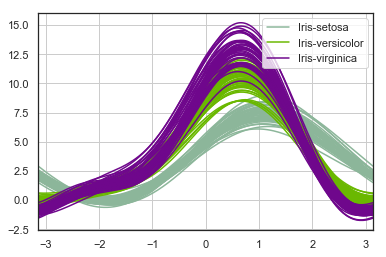

In [63]:
# One cool more sophisticated technique pandas has available is called Andrews Curves
# Andrews Curves involve using attributes of samples as coefficients for Fourier series
# and then plotting these
from pandas.tools.plotting import andrews_curves
andrews_curves(iris_dataset, "class")


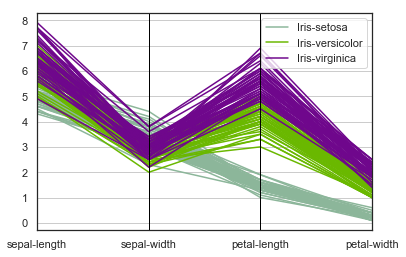

In [64]:
# Another multivariate visualization technique pandas has is parallel_coordinates
# Parallel coordinates plots each feature on a separate column & then draws lines
# connecting the features for each data sample
from pandas.tools.plotting import parallel_coordinates
parallel_coordinates(iris_dataset, "class")



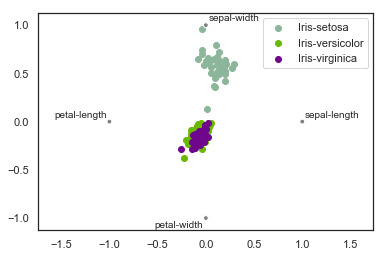

In [65]:
# A final multivariate visualization technique pandas has is radviz
# Which puts each feature as a point on a 2D plane, and then simulates
# having each sample attached to those points through a spring weighted
# by the relative value for that feature
from pandas.tools.plotting import radviz
radviz(iris_dataset, "class")